# RNN movie recommandation system
RNN has been used in many interesting applications such as composing a new song, writing a novel, text book or even the code. Usually it is used in the learning sequence event such as melody or words. By assuming there is a pattern embedded inside the song and the novel, RNN is able to find the hidden patten and create a new work accordingly. It also can be used in the recommendation. The movie list is a sequence of event for users. Here we used exactly the same method in composing a new song to build the recommendation system by selecting the top 10 unseen movies after training the RNN(LSTM).  

In [1]:
import numpy as np
import pandas as pd
import os
dir_path = os.path.dirname(os.path.realpath('__file__'))
data_path=dir_path+"/ml-100k/"

idx2movie={}
movie2idx={}
f = open(data_path+"u.item", "r") 
for line in f:
    col=line.split("|")
    i=int(col[0])
    name=col[1]
    idx2movie[i]=name
    movie2idx[name]=i
nb_classes=len(idx2movie)
print movie2idx['Toy Story (1995)']
print idx2movie[1]
print "total movies=",nb_classes

df=pd.read_csv(data_path+"u.data",sep="\t",names=["userID","movieID","rate","ref"])
df.head()    

1
Toy Story (1995)
total movies= 1682


,userID,movieID,rate,ref
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


# User movie sequence
X is 5 sequence movies list for user and target y is the 6th movie in the list. The input of RNN is illustrated in the Fig.  
<img src="image/RNN.jpg" width="500" height="500" />

In [36]:
def one_hot(x):
    x = np.array(x).reshape(-1)
    x_one_hot = np.eye(nb_classes)[x]
    return x_one_hot 
# Pull moive list for user 196
values=df[df.userID==196].values
movie_seq= values[:, 1]
print movie_seq
#Set Batch size
B=5
min_batch=len(movie_seq)/B
X=[]
y=[]
y_true=[]
for i in range(min_batch):
    Xt=movie_seq[i*B:(i+1)*B]
    yt=np.full(B, movie_seq[(i+1)*B])
    y_true.append(movie_seq[(i+1)*B])
    x_one_hot=one_hot(Xt)
    y_one_hot=one_hot(yt)
    X.append(x_one_hot)
    y.append(y_one_hot)

x_train=np.array(X,dtype=float)
y_train=np.array(y,dtype=float)
print x_train.shape
print y_train.shape
    

[ 242  393  381  251  655   67  306  238  663  111  580   25  286   94
  692    8  428 1118   70   66  257  108  202  340  287  116  382  285
 1241 1007  411  153   13  762  173 1022  845  269  110]
(7, 5, 1682)
(7, 5, 1682)


In [41]:
#min_batch test
Xt=movie_seq[0:B]
yt=np.full(B, movie_seq[B])
x_one_hot=one_hot(Xt)
y_one_hot=one_hot(yt)
x_train=np.array(x_one_hot,dtype=float).reshape((1,x_one_hot.shape[0],x_one_hot.shape[1]))
y_train=np.array(y_one_hot,dtype=float).reshape((1,y_one_hot.shape[0],y_one_hot.shape[1]))
print x_train.shape
print y_train.shape

(1, 5, 1682)
(1, 5, 1682)


In [42]:
from keras.models import Sequential
from keras.layers.recurrent import LSTM
from keras.layers import Activation, Dense
model = Sequential()
model.add(LSTM(nb_classes , input_shape=x_train.shape[1:], return_sequences=True))
model.add(Activation('softmax'))
model.compile(loss="categorical_crossentropy", optimizer="rmsprop")
history=model.fit(x_train,y_train,batch_size=B,epochs=100)
predict=model.predict(x_train)
for e in zip(model.layers[0].trainable_weights, model.layers[0].get_weights()):
    print('Param %s:\n%s' % (e[0],e[1]))

Param Tensor("lstm_8/kernel/read:0", shape=(1682, 6728), dtype=float32):
[[-0.00479269 -0.00136184 -0.01218671 ...  0.01847132 -0.02405449
  -0.02102333]
 [ 0.00518712 -0.0077686  -0.01099155 ... -0.01343765  0.00971337
  -0.01947554]
 [ 0.02064326  0.00749066 -0.01797482 ...  0.02428228  0.01751403
   0.00588353]
 ...
 [-0.01423892  0.01444109  0.00670791 ... -0.01640961 -0.02360051
   0.00882589]
 [-0.02540233  0.0028766   0.0252197  ...  0.01736873 -0.00280625
   0.00060515]
 [-0.02207867  0.01476911  0.00746617 ...  0.01551127 -0.02311827
   0.02306238]]
Param Tensor("lstm_8/recurrent_kernel/read:0", shape=(1682, 6728), dtype=float32):
[[ 0.00283138  0.01244646  0.01169096 ...  0.0168052   0.00083848
   0.01620256]
 [-0.00594658 -0.00956196 -0.00662148 ...  0.00414205 -0.00970524
  -0.00609397]
 [ 0.00362352  0.01620127  0.00119714 ...  0.0040362  -0.01394003
  -0.00437585]
 ...
 [ 0.01347939  0.00499442  0.00788386 ... -0.00838796  0.00405243
  -0.00448701]
 [ 0.00979616  0.003282

7/7 [==============================] - 2s 301ms/step - loss: 5.9444
Epoch 88/100
7/7 [==============================] - 2s 285ms/step - loss: 5.9438
Epoch 89/100
7/7 [==============================] - 2s 281ms/step - loss: 5.9432
Epoch 90/100
7/7 [==============================] - 2s 288ms/step - loss: 5.9426
Epoch 91/100
7/7 [==============================] - 2s 296ms/step - loss: 5.9421
Epoch 92/100
7/7 [==============================] - 2s 298ms/step - loss: 5.9415
Epoch 93/100
7/7 [==============================] - 2s 284ms/step - loss: 5.9409
Epoch 94/100
7/7 [==============================] - 2s 289ms/step - loss: 5.9403
Epoch 95/100
7/7 [==============================] - 2s 289ms/step - loss: 5.9398
Epoch 96/100
7/7 [==============================] - 2s 289ms/step - loss: 5.9392
Epoch 97/100
7/7 [==============================] - 2s 285ms/step - loss: 5.9386
Epoch 98/100
7/7 [==============================] - 2s 281ms/step - loss: 5.9380
Epoch 99/100
7/7 [=======================

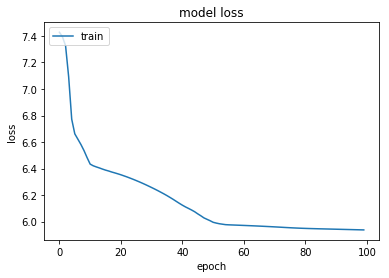

In [43]:
# convergence process
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [44]:

from collections import Counter
nextmovie=[]

for i in range(predict.shape[0]):
    temp=[]
    for j in range(predict.shape[1]):
        temp.append(np.argmax(predict[i,j]))
    most_common,num_most_common = Counter(temp).most_common(1)[0] 
    nextmovie.append(most_common)
print y_true
print nextmovie
for i in range(len(y_true)):
    print "predicted: ",idx2movie[nextmovie[i]], ", ground truth: ",idx2movie[y_true[i]]


[67, 580, 8, 257, 116, 411, 1022]
[67, 580, 8, 257, 116, 411, 1022]
predicted:  Ace Ventura: Pet Detective (1994) , ground truth:  Ace Ventura: Pet Detective (1994)
predicted:  Englishman Who Went Up a Hill, But Came Down a Mountain, The (1995) , ground truth:  Englishman Who Went Up a Hill, But Came Down a Mountain, The (1995)
predicted:  Babe (1995) , ground truth:  Babe (1995)
predicted:  Men in Black (1997) , ground truth:  Men in Black (1997)
predicted:  Cold Comfort Farm (1995) , ground truth:  Cold Comfort Farm (1995)
predicted:  Nutty Professor, The (1996) , ground truth:  Nutty Professor, The (1996)
predicted:  Fast, Cheap & Out of Control (1997) , ground truth:  Fast, Cheap & Out of Control (1997)


The predicted match the ground truth. Next we can list the recommended movies from the final batch. Only unseen movies are recommended for user 196.

In [45]:
x_test=movie_seq[len(movie_seq)-B:]
x_test=one_hot(x_test)
x_test=np.array(x_one_hot,dtype=float).reshape((1,x_test.shape[0],x_test.shape[1]))
predict_new=model.predict(x_test)
# recommand unseen movies with top 10 score
top10=np.argsort(predict_new[0,-1])
k=0
for i in range(len(top10)-1,0,-1):
    if top10[i]not in movie_seq and k<10:
        print idx2movie[top10[i]]
        k+=1

Apt Pupil (1998)
Sleepover (1995)
Rocket Man (1997)
Titanic (1997)
Boys, Les (1997)
Wings of the Dove, The (1997)
Affair to Remember, An (1957)
Outlaw, The (1943)
Little Lord Fauntleroy (1936)
Paris Was a Woman (1995)


# Future work
1. Model performance evaluation 
2. [Collaborative RNN](http://proceedings.mlr.press/v63/ko101.pdf)
3. Other deep learning recommandation system